In [1]:
import math
import cv2 as cv
import cupy as cp
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def apply_filter(img, kernel=None, padding=0):
    img_rows, img_cols = img.shape[0], img.shape[1]
    k_r, k_c = kernel.shape[0], kernel.shape[1]
    rows, cols = img.shape[0] - k_r + 2 * padding + 1, img.shape[1] - k_c + 2 * padding + 1
    res = np.zeros((img_rows + 2*padding, img_cols + 2*padding))
    img_d = np.pad(img, pad_width=(padding, padding))

    for i in range(rows):
        for j in range(cols):
            ii = math.floor((2*i+k_r)/2)
            jj = math.floor((2*j+k_c)/2)
            res[ii,jj] = np.sum(np.multiply(img_d[i:i+k_r,j:j+k_c], kernel))
    
    return res[padding:-padding, padding:-padding]

In [3]:
def prewitt(img, padding=1):
    kernel1 = np.repeat([[1,0,-1]], 3, axis=0)
    kernel2 = np.repeat([[1],[0],[-1]], 3, axis=1)

    res1 = apply_filter(img, kernel=kernel1, padding=padding)
    res2 = apply_filter(img, kernel=kernel2, padding=padding)

    res = np.sqrt(np.square(res1) + np.square(res2))
    return res

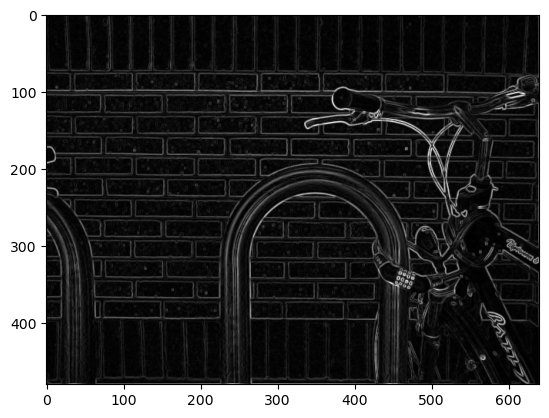

In [4]:
img = cv.imread('../datasets/Bikesgray.jpg', cv.IMREAD_GRAYSCALE)

pwt = prewitt(img)

plt.imshow(pwt, cmap='gray')

In [5]:
def sobel(img, padding=1):
    kernel1 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    kernel2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    res1 = apply_filter(img, kernel=kernel1, padding=padding)
    res2 = apply_filter(img, kernel=kernel2, padding=padding)

    res = np.sqrt(np.square(res1) + np.square(res2))
    return res

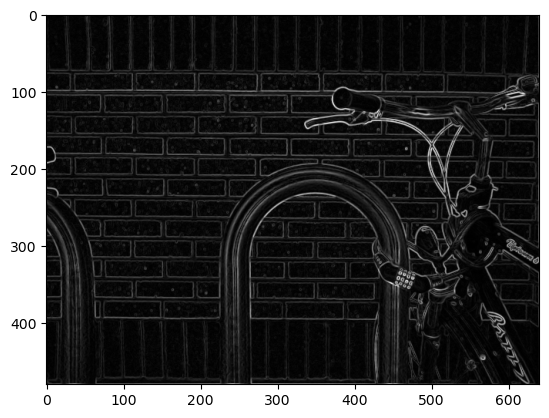

In [6]:
img = cv.imread('../datasets/Bikesgray.jpg', cv.IMREAD_GRAYSCALE)

sbl = sobel(img)

plt.imshow(sbl, cmap='gray')

In [7]:
def laplace(img, padding=1, alpha=1):
    kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
    
    res = apply_filter(img, kernel=kernel, padding=padding)
    
    return res + alpha

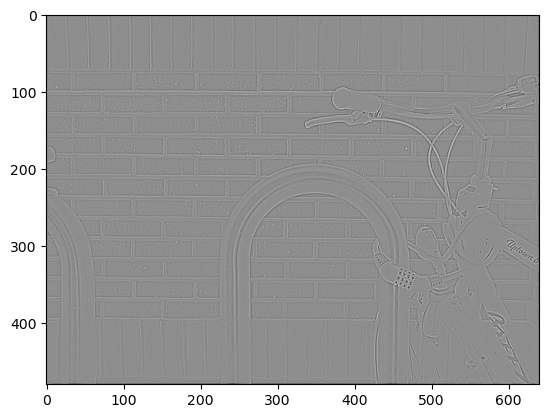

In [8]:
img = cv.imread('../datasets/Bikesgray.jpg', cv.IMREAD_GRAYSCALE)

lpl = laplace(img, alpha=1)

plt.imshow(lpl, cmap='gray')

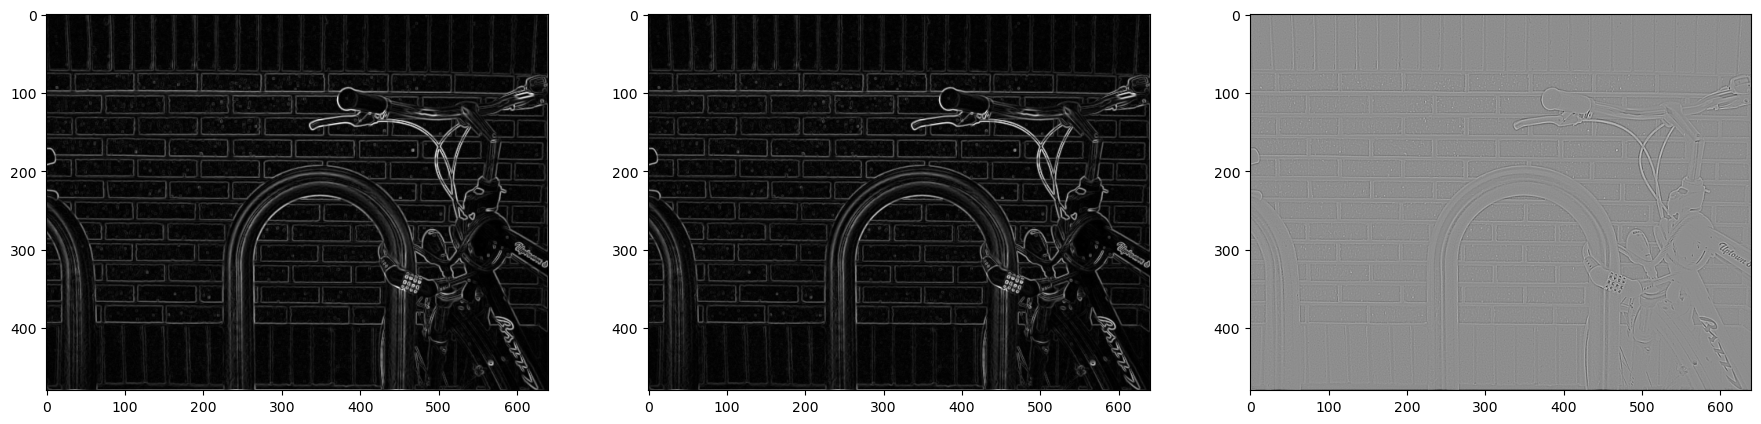

In [9]:
fig, axes = plt.subplots(1,3, figsize=(22,17))

for k, img in enumerate([pwt,sbl,lpl]):
    axes[k].imshow(img, cmap='gray')